In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
import us2s_OV
import us2s_OV_revised

In [2]:
L     = 100  # レーンの長さ
n_0   = 3  # monitoring period
x_0   = 1  # 最短車間距離
v_0   = 4  # 車両の最高速度
dt    = 1  # 時間差分

density = []
flow = []

In [3]:
# 密度を変えて、複数の初期条件からflowを計算
for K in range(0, 101):
	sys.stdout.write("\r({}/{})".format(K, 100))
	sys.stdout.flush()
	for _ in range(1): # 各密度について100回ずつ計算
		# 車両の初期位置をランダムに生成
		x_init = np.array(sorted(random.sample([i for i in range(L)], K)))
		model = us2s_OV.us2s_OV(L, K, n_0, x_0, v_0, dt, x_init)
		model.simulate(1010)
		density.append(model.density())
		flow.append(model.flow(800, 1000))


(100/100)

In [8]:
# 密度を変えて、複数の初期条件からflowを計算
for K in range(0, 101):
	sys.stdout.write("\r({}/{})".format(K, 100))
	sys.stdout.flush()
	for _ in range(1000): # 各密度について100回ずつ計算
		# 車両の初期位置をランダムに生成
		x_init = np.array(sorted(random.sample([i for i in range(L)], K)))
		model = us2s_OV_revised.us2s_OV(L, K, n_0, x_0, v_0, dt, x_init)
		model.simulate(1010)
		density.append(model.density())
		flow.append(model.flow(800, 1000))

(100/100)

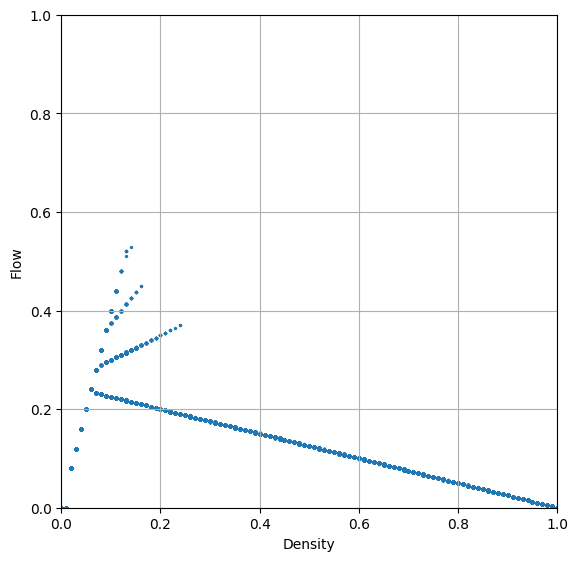

In [9]:
plt.figure(figsize=(6.4, 6.4))
plt.grid()
plt.scatter(
	x=density,
	y=flow,
	s=2,
	marker='o',
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Density")
plt.ylabel("Flow")
plt.show()